In [141]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd

### Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.
1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

### 1.

In [63]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
Y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
b1 = ((X * Y).mean() - X.mean() * Y.mean()) / ((X**2).mean() - (X.mean()**2))
b0 = Y.mean() - b1 * X.mean()

ones = np.ones((X.shape[0], 1))
X1 = np.hstack((ones, X.reshape(-1, 1)))
XTX = X1.T.dot(X1)
b = np.linalg.inv(XTX).dot(X1.T).dot(Y)
print('Коэффициенты по формуле МНК:','b1 -', b[1], 'b0 -', b[0])
print('Коэффициенты по формуле парной регрессии:','b1 -', b1, 'b0 -', b0)

Коэффициенты по формуле МНК: b1 - 2.6205388824027684 b0 - 444.17735732435915
Коэффициенты по формуле парной регрессии: b1 - 2.620538882402765 b0 - 444.1773573243596


### 2.

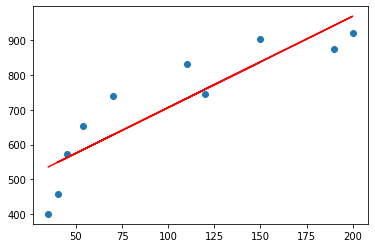

In [80]:
plt.scatter(X, Y);
plt.plot(X, X1.dot(b), color='r');

### 3.

In [79]:
Z = b[0] + b[1] * X
R2 = Z.var() / Y.var()
A = sum(abs((Y - Z)/Y))/len(X)
print('коэффициент детерминации:', R2, 'средняя ошибка аппроксимации:', A)

коэффициент детерминации: 0.7876386635293701 средняя ошибка аппроксимации: 0.11469251843561715


### 4.

In [86]:
T = (R2 / (1 - R2)) * ((len(X) - 1 - 1) / 1)
if T > scipy.stats.f.ppf(0.95, 1, len(X) - 1 - 1):
    print('Уравнение регресси статистически значимо', 'Т:', T)
else:
    print('Уравнение регрессии статистически не значимо')

Уравнение регресси статистически значимо Т: 29.671640859664766


### 5.

In [114]:
alfa = 0.05
S_slope = np.sqrt((sum((Y - Z)**2)/(len(X) - 2)) / (sum((X - X.mean())**2)))
t = scipy.stats.t.ppf(1 - alfa/2, df=10)
print('доверительный интервал для b1:', b[1] - t * S_slope, b[1] + t * S_slope)
S_inter = S_slope * np.sqrt(sum(X**2)/len(X))
print('доверительный интервал для b0:', b[0] - t * S_inter, b[0] + t * S_inter)

доверительный интервал для b1: 1.5486196143247526 3.6924581504807845
доверительный интервал для b0: 318.3621602973026 569.9925543514157


### Задача 2

Допустим, первые 5 клиентов из предыдущего задания проживают в Москве, а остальные - в Санкт-Петербурге. Влияет ли этот фактор на значение их кредитного скоринга?

In [136]:
Moscow_score = Y[:5].mean()
Saint_P_score = Y[5:].mean()
S_F = ((Moscow_score - Y.mean())**2 * 5) + ((Saint_P_score - Y.mean())**2 * 5)
S_res = ((Y[:5] - Moscow_score)**2).sum() + ((Y[5:] - Saint_P_score)**2).sum()
np.round(S_F + S_res, decimals=7) == np.round(((Y - Y.mean())**2).sum(), decimals=7)

True

In [140]:
sigma_F = S_F / 1
sigma_res = S_res / 8
T_ = sigma_F / sigma_res
scipy.stats.f.ppf(1 - 0.05/2, 1, 8), T_

(7.57088209969174, 1.2650596914169643)

#### Поскольку значение статистики меньше чем критическое значение Фишера, мы заключаем, что фактор не влияет на целевую переменную.

### Задача 3

Посчитать коэффициенты линейной регрессии для т.н. Квартета Энскомба (см. урок 6).

In [176]:
Escombe_set = pd.read_csv('anscombe_dataset.csv', index_col = 'id')

B1_x1 = ((Escombe_set['x1'] * Escombe_set['y1']).mean() - Escombe_set['x1'].mean() * Escombe_set['y1'].mean()) / ((Escombe_set['x1']**2).mean() - (Escombe_set['x1'].mean()**2))
B0_x1 = Escombe_set['y1'].mean() - B1_x1 * Escombe_set['x1'].mean()

B1_x2 = ((Escombe_set['x2'] * Escombe_set['y2']).mean() - Escombe_set['x2'].mean() * Escombe_set['y2'].mean()) / ((Escombe_set['x2']**2).mean() - (Escombe_set['x2'].mean()**2))
B0_x2 = Escombe_set['y2'].mean() - B1_x2 * Escombe_set['x2'].mean()

B1_x3 = ((Escombe_set['x3'] * Escombe_set['y3']).mean() - Escombe_set['x3'].mean() * Escombe_set['y3'].mean()) / ((Escombe_set['x3']**2).mean() - (Escombe_set['x3'].mean()**2))
B0_x3 = Escombe_set['y3'].mean() - B1_x3 * Escombe_set['x3'].mean()

B1_x4 = ((Escombe_set['x4'] * Escombe_set['y4']).mean() - Escombe_set['x4'].mean() * Escombe_set['y4'].mean()) / ((Escombe_set['x4']**2).mean() - (Escombe_set['x4'].mean()**2))
B0_x4 = Escombe_set['y4'].mean() - B1_x4 * Escombe_set['x4'].mean()

print('Коэффициенты по признаку Х1:', B0_x1, B1_x1, 'Коэффициенты по признаку Х2:', B0_x2, B1_x2, 
      'Коэффициенты по признаку Х3:', B0_x3, B1_x3, 'Коэффициенты по признаку Х4:', B0_x4, B1_x4, sep='\n')

Коэффициенты по признаку Х1:
3.0000909090909245
0.5000909090909076
Коэффициенты по признаку Х2:
3.000909090909091
0.5
Коэффициенты по признаку Х3:
3.0024545454545697
0.49972727272727013
Коэффициенты по признаку Х4:
3.0017272727272584
0.4999090909090924


#### Я просто взял и подставил данные из датасета в формулу парной регресси из первой задачи, надеюсь я не ошибся)